In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import math

In [5]:
with (open("higgs.pkl", "rb")) as openfile:
    higgs = pickle.load(openfile)
with (open("qcd.pkl", "rb")) as openfile:
    qcd = pickle.load(openfile)
    
plt.rcParams["figure.figsize"] = (75,75)

# 1) Do all features provide discrimination power between signal and background?

(0.0, 1.0, 0.0, 1.0)

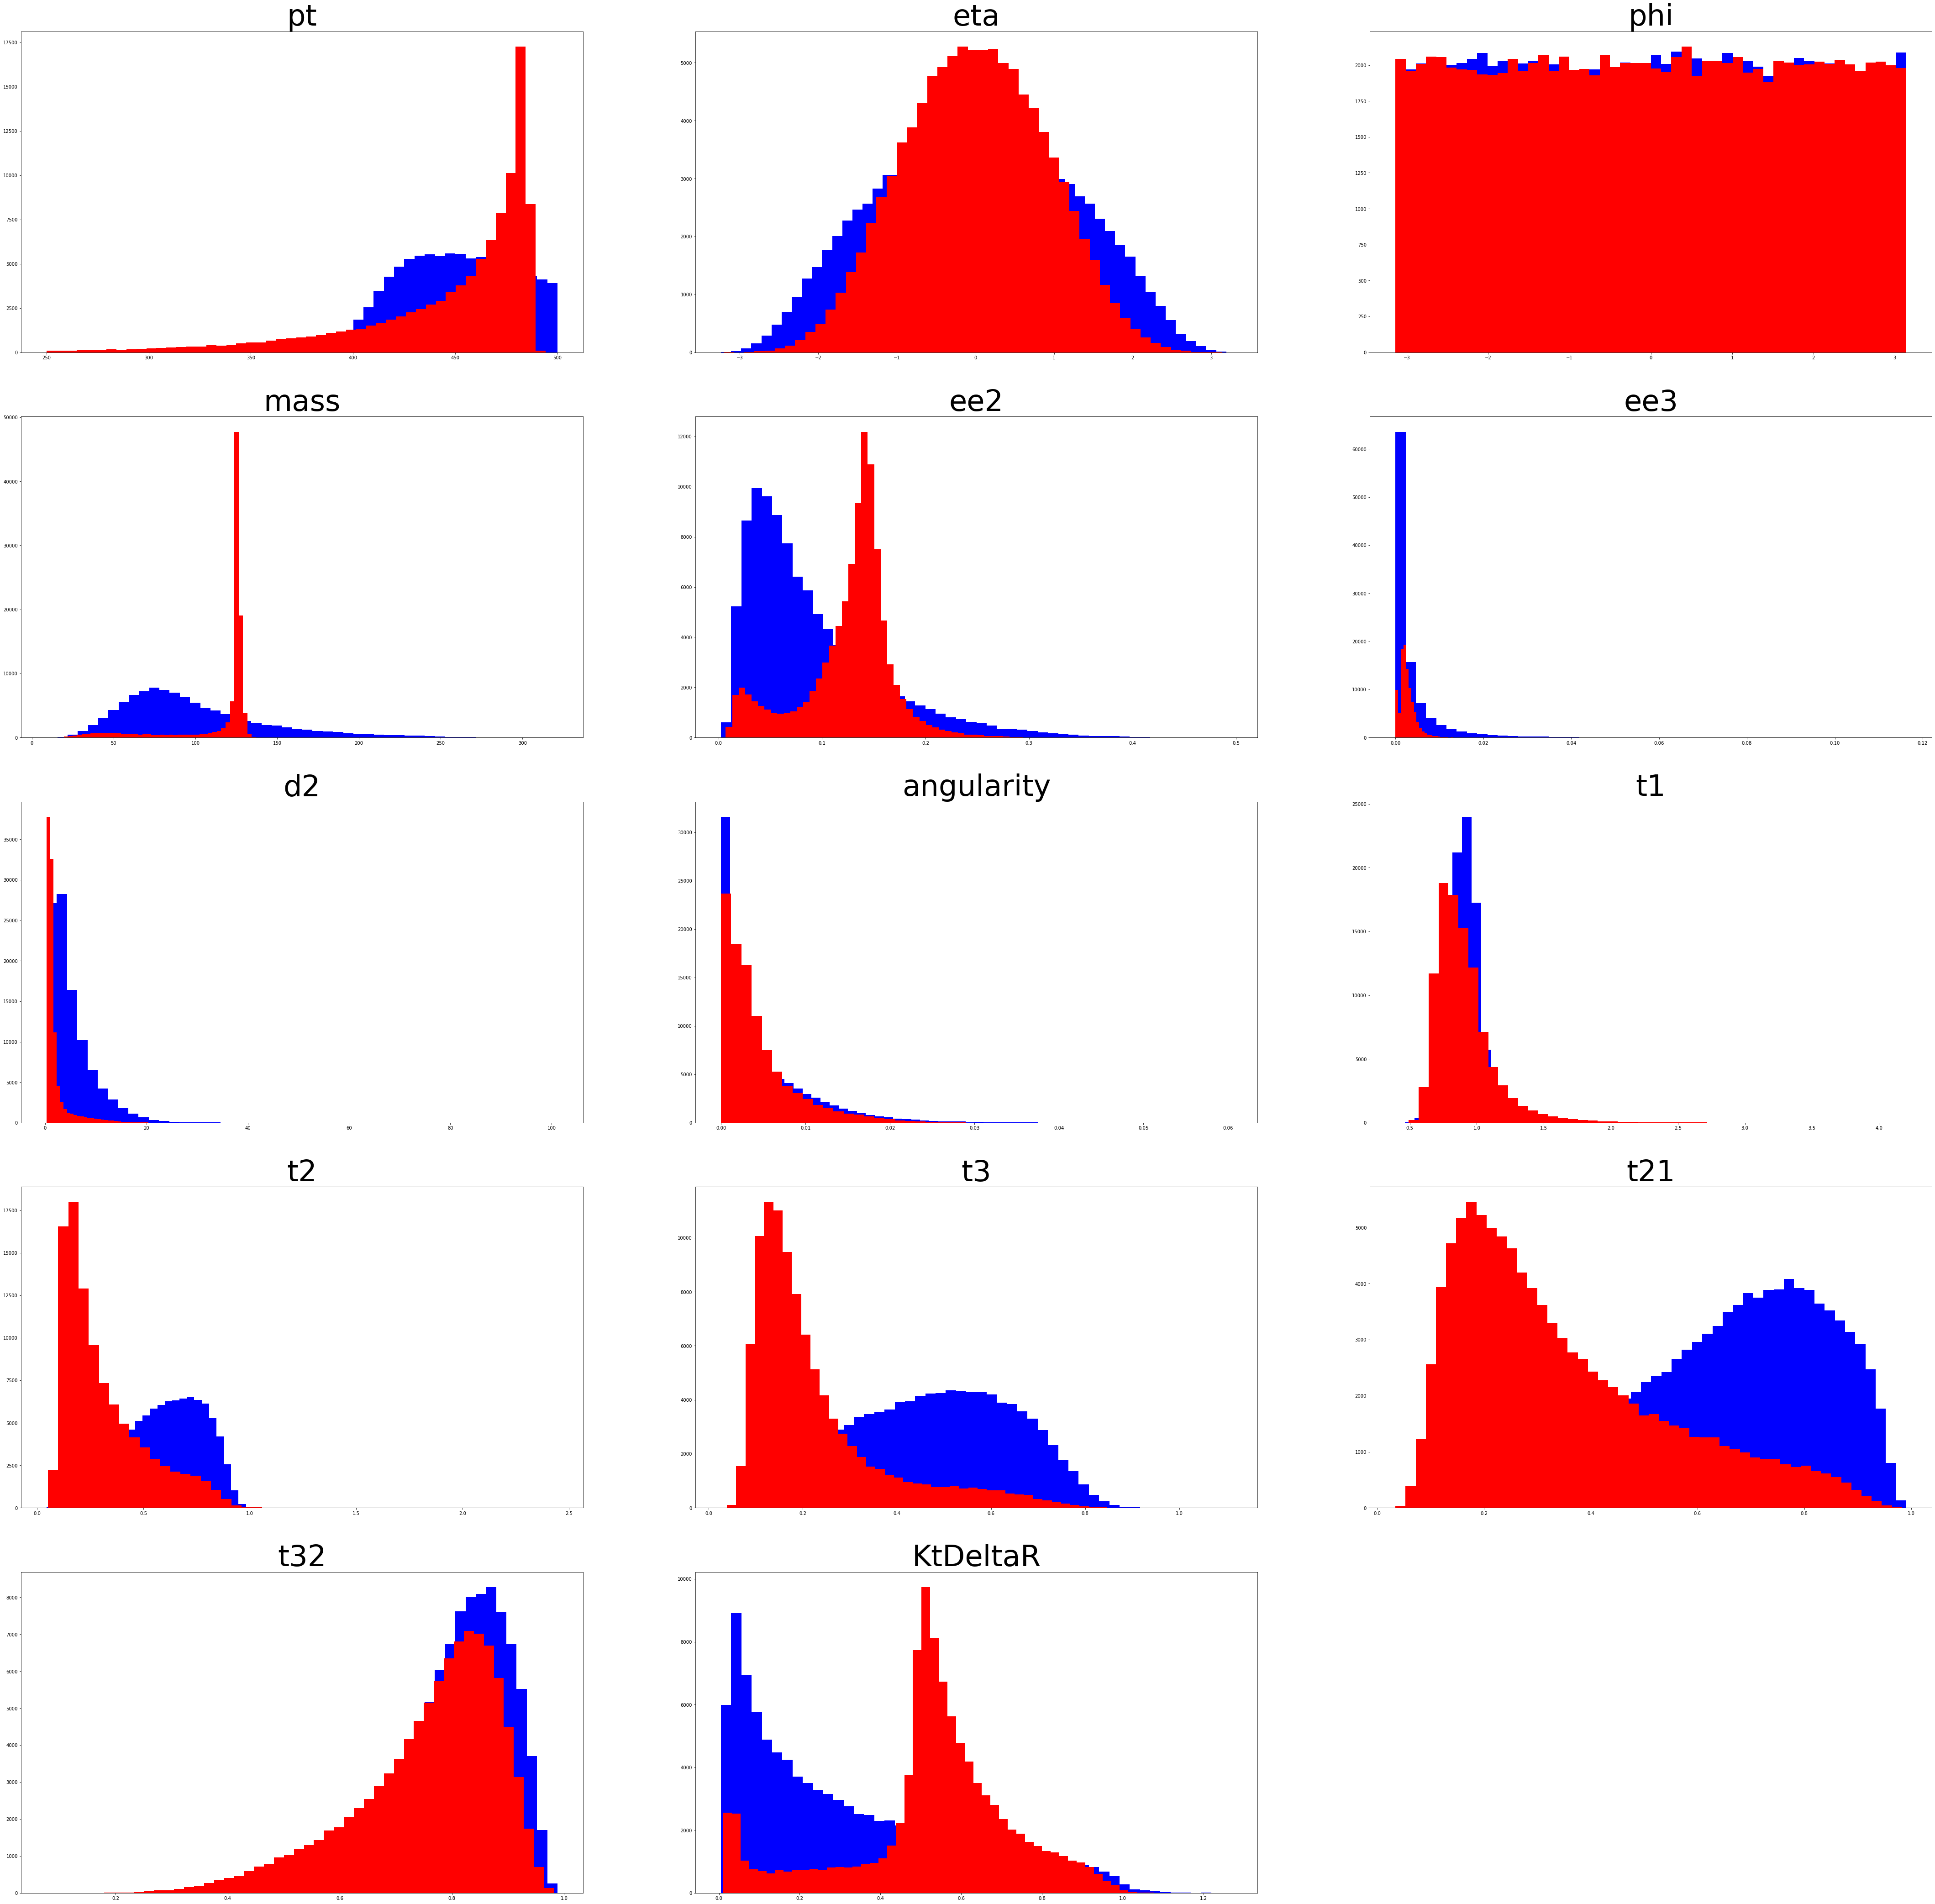

In [13]:
fig, ax = plt.subplots(nrows = 5, ncols = 3)
x = range(100000)
for i in range(14):
    ax[math.floor(i/3),i%3].hist(qcd[qcd.columns[i]], color = 'blue', bins = 50)
    ax[math.floor(i/3),i%3].hist(higgs[higgs.columns[i]], color='red', bins = 50)
    ax[math.floor(i/3),i%3].set_title(str(higgs.columns[i]), fontsize = 64)
ax[4,2].axis('off')